# Censo dti

Análise dos dados obtidos no censo da dti.

## Obtenção dos dados

Obtenção dos dados do arquivo do censo e importação de bibliotecas de uso geral.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

censo = pd.read_csv("censo.csv")

display(censo.head())

,Carimbo de data/hora,Qual a sua área?,Com qual Gênero você se identifica?,Qual a sua orientação sexual?,Qual a sua religião?,Como você declara sua etnia?,Possui alguma deficiência?,"Em caso afirmativo para a pergunta anterior, qual seria a deficiência?",Sobre diversidade na dti. O que você pensa a respeito?
0,07/11/2018 18:07:28,Design,Feminino,Heterossexual,Budismo,Branca,Não,NaN,Acredito que todos são bem vindos e se sentem ...
1,07/11/2018 22:57:32,Desenvolvimento,Masculino,Bissexual,Budismo,Branca,Não,NaN,Vejo que a DTI se mostra bem aberta a todos. I...
2,07/11/2018 17:40:46,Design,Masculino,Heterossexual,NaN,Branca,Não,NaN,NaN
3,07/11/2018 17:48:17,Administrativo,Masculino,Heterossexual,Ateu,Branca,Não,NaN,NaN
4,07/11/2018 14:59:58,Marketing,Masculino,Homossexual,Católica,Negra,Não,NaN,Um assunto que deve ser abordado sempre. Temos...


## Pre processamento de dados

### Remoção de features subjetivas

Removendo as colunas subjetivas que não podem ser usadas para predições ou agrupamentos.

Como ninguém respondeu que possui alguma deficiência, este campo será removido também.

In [2]:
censo_features = censo.drop(columns=[
    'Carimbo de data/hora', 
    'Possui alguma deficiência?',
    'Em caso afirmativo para a pergunta anterior, qual seria a deficiência?', 
    'Sobre diversidade na dti. O que você pensa a respeito?'])

display(censo_features.head())

,Qual a sua área?,Com qual Gênero você se identifica?,Qual a sua orientação sexual?,Qual a sua religião?,Como você declara sua etnia?
0,Design,Feminino,Heterossexual,Budismo,Branca
1,Desenvolvimento,Masculino,Bissexual,Budismo,Branca
2,Design,Masculino,Heterossexual,NaN,Branca
3,Administrativo,Masculino,Heterossexual,Ateu,Branca
4,Marketing,Masculino,Homossexual,Católica,Negra


In [3]:
lgbtq = []
for i in range(0, len(censo_features['Qual a sua área?'])):
    lgbtq.append(
        censo_features['Qual a sua orientação sexual?'][i] != 'Heterossexual'
        or
        (censo_features['Com qual Gênero você se identifica?'][i] != 'Masculino' and 
         censo_features['Com qual Gênero você se identifica?'][i] != 'Feminino')
    )
censo_features['LGBTQ+'] = lgbtq
display(censo_features.head())

,Qual a sua área?,Com qual Gênero você se identifica?,Qual a sua orientação sexual?,Qual a sua religião?,Como você declara sua etnia?,LGBTQ+
0,Design,Feminino,Heterossexual,Budismo,Branca,False
1,Desenvolvimento,Masculino,Bissexual,Budismo,Branca,True
2,Design,Masculino,Heterossexual,NaN,Branca,False
3,Administrativo,Masculino,Heterossexual,Ateu,Branca,False
4,Marketing,Masculino,Homossexual,Católica,Negra,True


## Distribuição dos dados

Histogramas básicos das distribuições encontradas

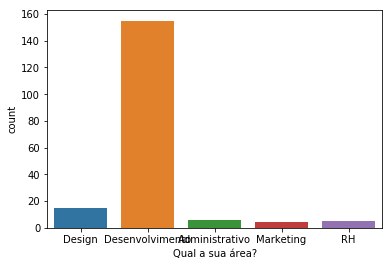

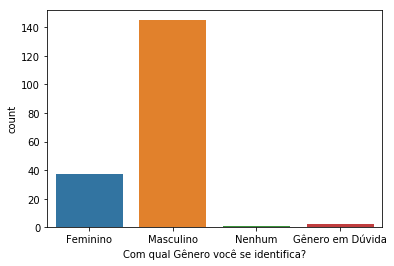

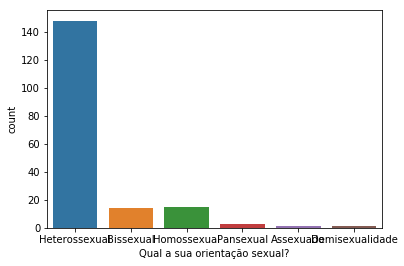

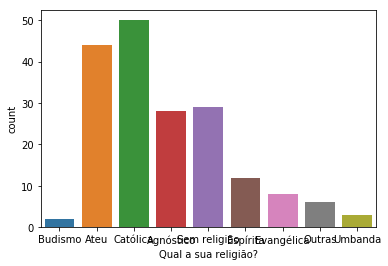

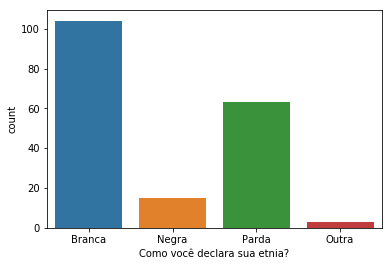

In [4]:
sns.countplot(x='Qual a sua área?', data=censo_features)
plt.show()

sns.countplot(x='Com qual Gênero você se identifica?', data=censo_features)
plt.show()

sns.countplot(x='Qual a sua orientação sexual?', data=censo_features)
plt.show()

sns.countplot(x='Qual a sua religião?', data=censo_features)
plt.show()

sns.countplot(x='Como você declara sua etnia?', data=censo_features)

## Separando os DataFrames por desenvolvimento/não desenvolvimento

In [5]:
censo_dev = censo_features.drop(censo_features[censo_features['Qual a sua área?'] != 'Desenvolvimento'].index)
censo_nao_dev = censo_features.drop(censo_features[censo_features['Qual a sua área?'] == 'Desenvolvimento'].index)

## Distribuição de pessoas LGBTQ+

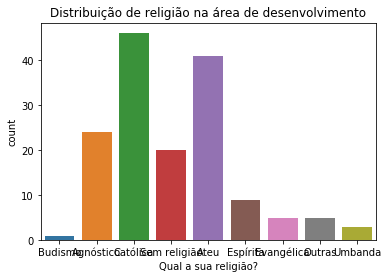

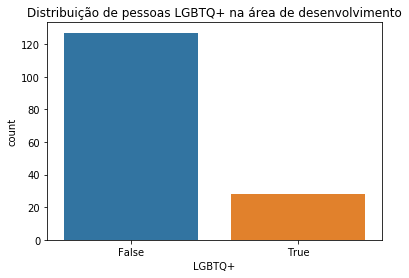

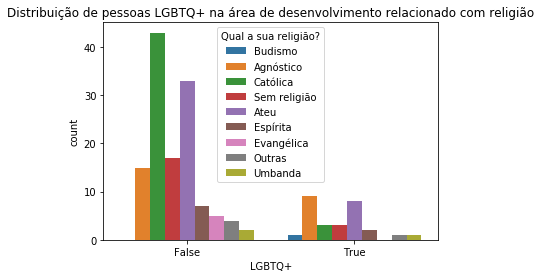

In [6]:
sns.countplot(x='Qual a sua religião?', data=censo_dev)
plt.title('Distribuição de religião na área de desenvolvimento')
plt.show()

sns.countplot(x='LGBTQ+', data=censo_dev)
plt.title('Distribuição de pessoas LGBTQ+ na área de desenvolvimento')
plt.show()


sns.countplot(x='LGBTQ+', hue='Qual a sua religião?', data=censo_dev)
plt.title('Distribuição de pessoas LGBTQ+ na área de desenvolvimento relacionado com religião')
plt.show()

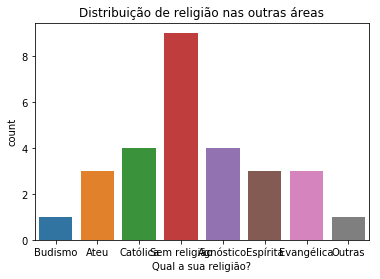

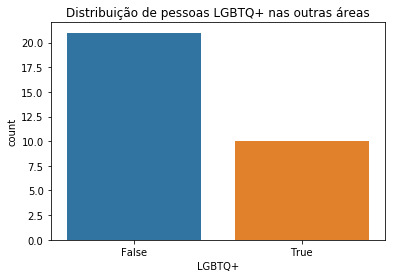

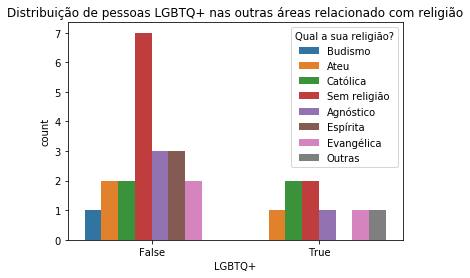

In [7]:
sns.countplot(x='Qual a sua religião?', data=censo_nao_dev)
plt.title('Distribuição de religião nas outras áreas')
plt.show()


sns.countplot(x='LGBTQ+', data=censo_nao_dev)
plt.title('Distribuição de pessoas LGBTQ+ nas outras áreas')
plt.show()


sns.countplot(x='LGBTQ+', hue='Qual a sua religião?', data=censo_nao_dev)
plt.title('Distribuição de pessoas LGBTQ+ nas outras áreas relacionado com religião')
plt.show()

## Distribuição de etnias

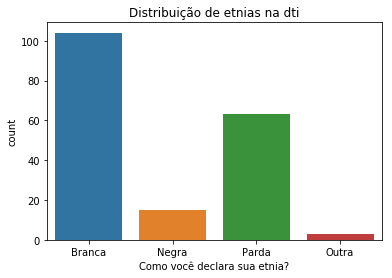

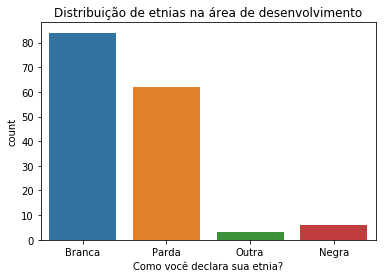

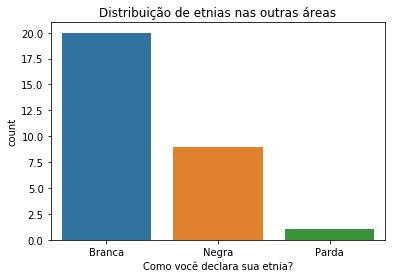

In [8]:
sns.countplot(x='Como você declara sua etnia?', data=censo_features)
plt.title('Distribuição de etnias na dti')
plt.show()

sns.countplot(x='Como você declara sua etnia?', data=censo_dev)
plt.title('Distribuição de etnias na área de desenvolvimento')
plt.show()

sns.countplot(x='Como você declara sua etnia?', data=censo_nao_dev)
plt.title('Distribuição de etnias nas outras áreas')
plt.show()

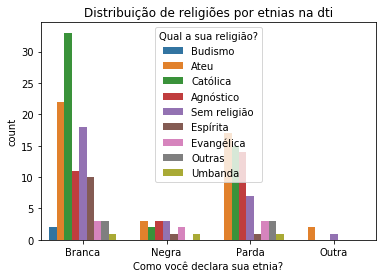

In [9]:
sns.countplot(x='Como você declara sua etnia?', hue='Qual a sua religião?', data=censo_features)
plt.title('Distribuição de religiões por etnias na dti')
plt.show()

## Análise da comunidade LGBTQ+ da dti

In [10]:
censo_lgbtq = censo_features.drop(censo_features[censo_features['LGBTQ+'] == False].index)

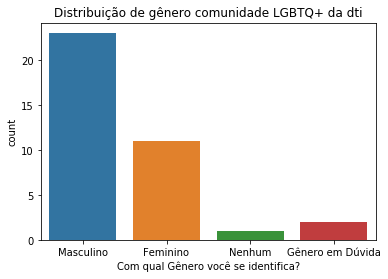

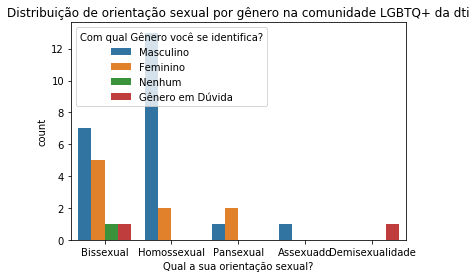

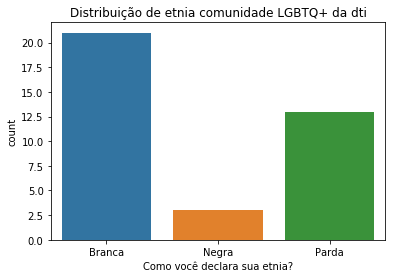

In [11]:
sns.countplot(x='Com qual Gênero você se identifica?', data=censo_lgbtq)
plt.title('Distribuição de gênero comunidade LGBTQ+ da dti')
plt.show()

sns.countplot(x='Qual a sua orientação sexual?', hue='Com qual Gênero você se identifica?', data=censo_lgbtq)
plt.title('Distribuição de orientação sexual por gênero na comunidade LGBTQ+ da dti')
plt.show()

sns.countplot(x='Como você declara sua etnia?', data=censo_lgbtq)
plt.title('Distribuição de etnia comunidade LGBTQ+ da dti')
plt.show()

# Análise de correlação entre os dados obtidos

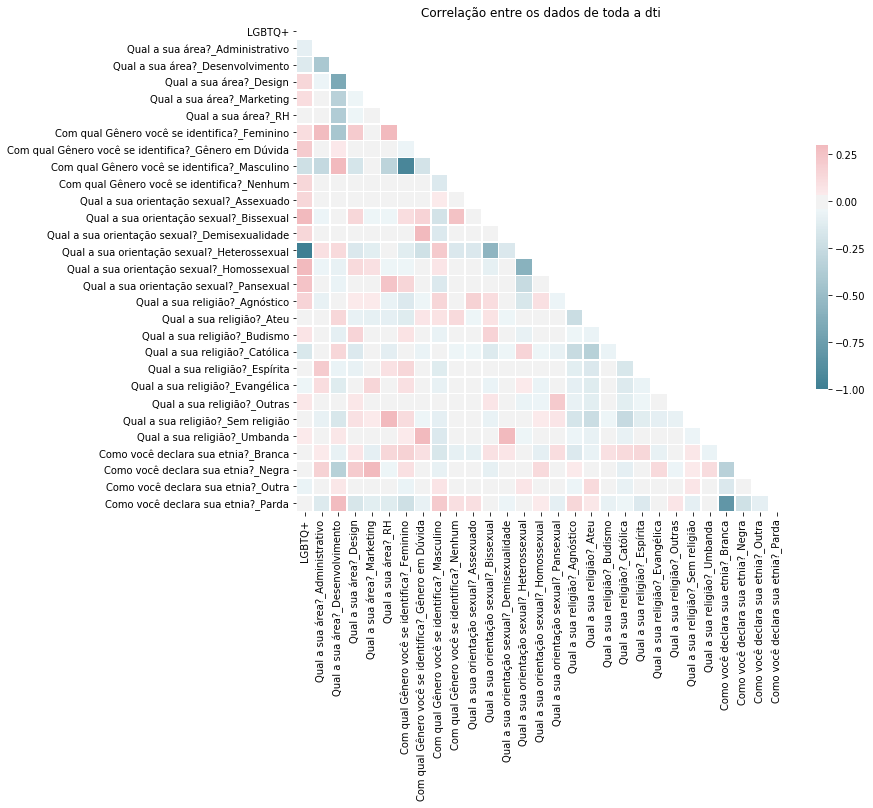

In [12]:
corr = pd.get_dummies(censo_features).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre os dados de toda a dti')
plt.show()

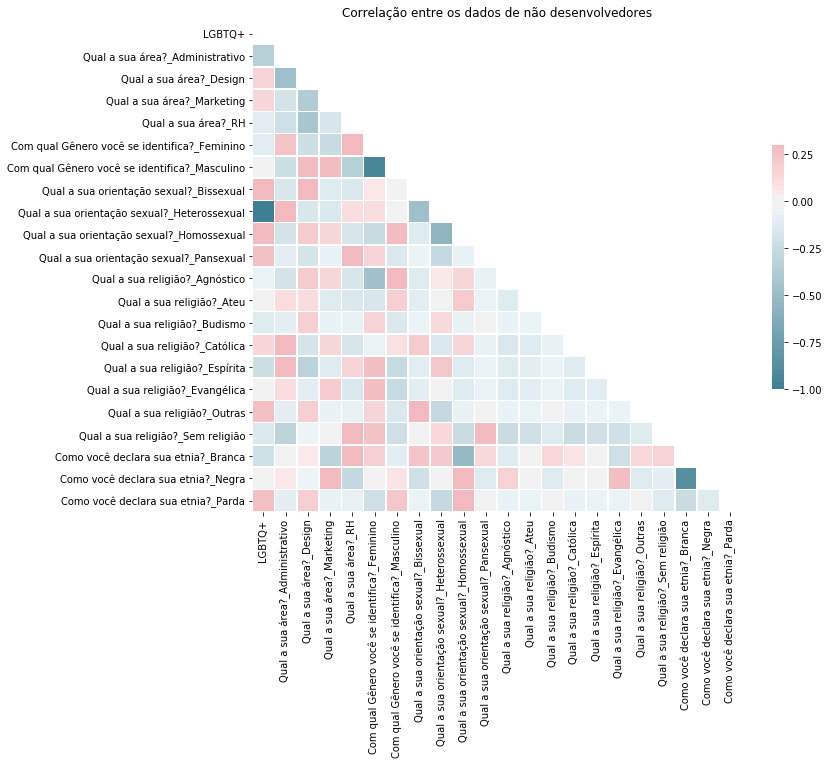

In [13]:
corr = pd.get_dummies(censo_nao_dev).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre os dados de não desenvolvedores')
plt.show()

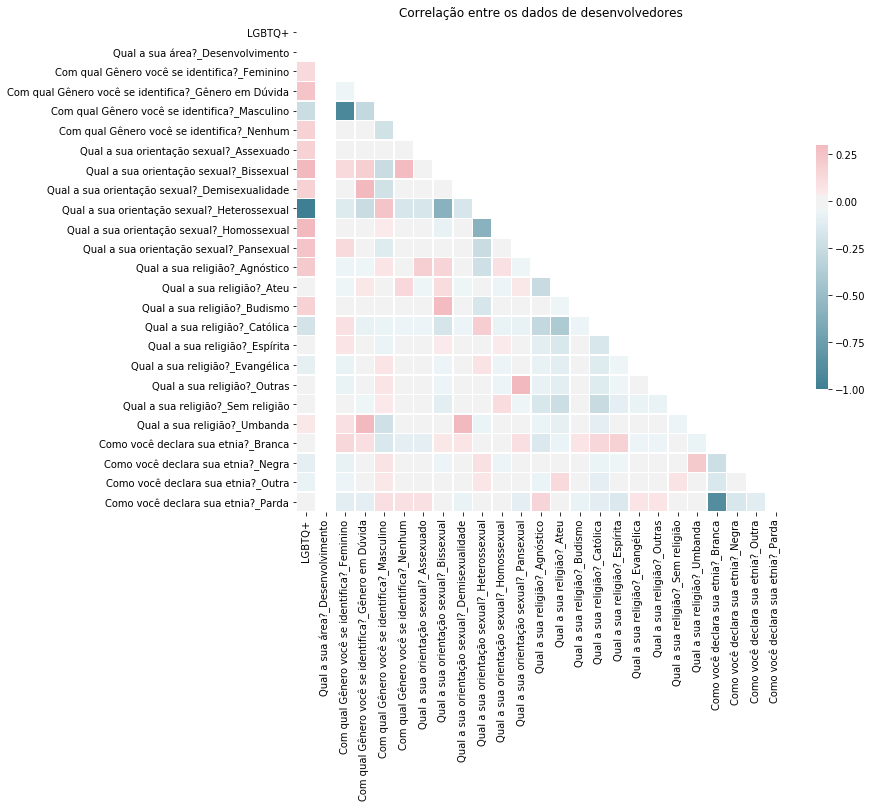

In [14]:
corr = pd.get_dummies(censo_dev).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre os dados de desenvolvedores')
plt.show()